**Bibliothèques Python nécessaires**

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from splot.esda import moran_scatterplot
from libpysal.weights import KNN, Queen, Rook, DistanceBand 
from esda.moran import Moran, Moran_Local
from esda.geary import Geary
from spreg import OLS, ML_Lag, ML_Error
from shapely.geometry import Point
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster
import statsmodels.api as sm

# Importing and reading data

In [3]:
filepath="C:/Users/ZAYED/Desktop/atelietr jelassi/atelier_NFL/data/NGS-2017-post.csv"
df = pd.read_csv(filepath) 
df 

Season_Year  GameKey  PlayID  GSISID                     Time  \
0               2017      665    1094   31940  2018-02-05 00:15:33.700   
1               2017      665    1094   28237  2018-02-05 00:15:33.900   
2               2017      665    1094   26293  2018-02-05 00:15:34.000   
3               2017      665    1094   29239  2018-02-05 00:15:34.000   
4               2017      665    1094   30288  2018-02-05 00:15:34.000   
...              ...      ...     ...     ...                      ...   
1037153         2017      656    1443   30528  2018-01-07 02:18:19.500   
1037154         2017      656    1443   31279  2018-01-07 02:18:19.500   
1037155         2017      656    1443   27691  2018-01-07 02:18:19.500   
1037156         2017      656    1443   32382  2018-01-07 02:18:19.500   
1037157         2017      656    1443   26143  2018-01-07 02:18:19.500   

                 x          y   dis           o         dir Event  
0        86.949997  31.740000  0.18   48.070000  204.600006   NaN  
1        79.760002  41.180000  0.16    5.320000  113.519997   NaN  
2        86.099998  28.520000  0.04  358.850006  117.839996   NaN  
3        87.760002  28.700001  0.01  322.109985  293.480011   NaN  
4        88.470001  33.520000  0.05   22.889999  126.959999   NaN  
...            ...        ...   ...         ...         ...   ...  
1037153  37.639999   4.670000  0.31  299.149994   22.820000   NaN  
1037154  40.669998  53.169998  0.17  123.849998  213.910004   NaN  
1037155  21.750000  11.470000  0.42  274.700012    7.750000   NaN  
1037156  50.910000  27.030001  0.19  272.540008    0.050000   NaN  
1037157  43.080002  53.110001  0.18  143.880005  224.220001   NaN  

[1037158 rows x 11 columns]

In [4]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037158 entries, 0 to 1037157
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Season_Year  1037158 non-null  int64  
 1   GameKey      1037158 non-null  int64  
 2   PlayID       1037158 non-null  int64  
 3   GSISID       1037158 non-null  int64  
 4   Time         1037158 non-null  object 
 5   x            1037158 non-null  float64
 6   y            1037158 non-null  float64
 7   dis          1037158 non-null  float64
 8   o            1037158 non-null  float64
 9   dir          1037158 non-null  float64
 10  Event        17528 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 87.0+ MB


Index(['Season_Year', 'GameKey', 'PlayID', 'GSISID', 'Time', 'x', 'y', 'dis',
       'o', 'dir', 'Event'],
      dtype='object')

In [5]:
df.describe() 

Season_Year       GameKey        PlayID        GSISID             x  \
count    1037158.0  1.037158e+06  1.037158e+06  1.037158e+06  1.037158e+06   
mean        2017.0  6.587788e+02  1.788741e+03  3.057772e+04  6.051557e+01   
std            0.0  2.864721e+00  1.198920e+03  2.574367e+03  2.036220e+01   
min         2017.0  6.550000e+02  1.170000e+02  1.959600e+04 -5.010000e+00   
25%         2017.0  6.560000e+02  5.950000e+02  2.898700e+04  4.570000e+01   
50%         2017.0  6.580000e+02  1.666000e+03  3.071100e+04  5.960000e+01   
75%         2017.0  6.610000e+02  2.743000e+03  3.267700e+04  7.545000e+01   
max         2017.0  6.650000e+02  4.414000e+03  3.396800e+04  1.208800e+02   

                  y           dis             o           dir  
count  1.037158e+06  1.037158e+06  1.037158e+06  1.037158e+06  
mean   2.680692e+01  1.795249e-01  1.835566e+02  1.765053e+02  
std    1.499189e+01  2.135282e-01  1.069449e+02  1.047594e+02  
min   -9.870000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.900000e+01  2.000000e-02  9.429000e+01  8.601000e+01  
50%    2.684000e+01  1.200000e-01  1.826400e+02  1.753400e+02  
75%    3.503000e+01  2.400000e-01  2.746200e+02  2.674200e+02  
max    6.472000e+01  2.210000e+00  3.600000e+02  3.600000e+02

**Vérifier les valeurs manquantes et les doublants**

In [6]:
print(df.isna().sum())
print(f"Nombre de doublons : {df.duplicated().sum()}")

Season_Year          0
GameKey              0
PlayID               0
GSISID               0
Time                 0
x                    0
y                    0
dis                  0
o                    0
dir                  0
Event          1019630
dtype: int64
Nombre de doublons : 0


# Visualisation des données 

**Matrice de Corrélation**

             Season_Year   GameKey    PlayID    GSISID         x         y  \
Season_Year          NaN       NaN       NaN       NaN       NaN       NaN   
GameKey              NaN  1.000000  0.004129  0.017760  0.002353  0.030034   
PlayID               NaN  0.004129  1.000000 -0.030104  0.063158  0.004414   
GSISID               NaN  0.017760 -0.030104  1.000000 -0.008738 -0.055093   
x                    NaN  0.002353  0.063158 -0.008738  1.000000  0.020121   
y                    NaN  0.030034  0.004414 -0.055093  0.020121  1.000000   
dis                  NaN  0.037082 -0.040579  0.034798  0.013100  0.012874   
o                    NaN -0.001488  0.012919  0.004017  0.000442 -0.058201   
dir                  NaN  0.017701  0.010527  0.000247 -0.035071  0.000046   

                  dis         o       dir  
Season_Year       NaN       NaN       NaN  
GameKey      0.037082 -0.001488  0.017701  
PlayID      -0.040579  0.012919  0.010527  
GSISID       0.034798  0.004017  0.000247  

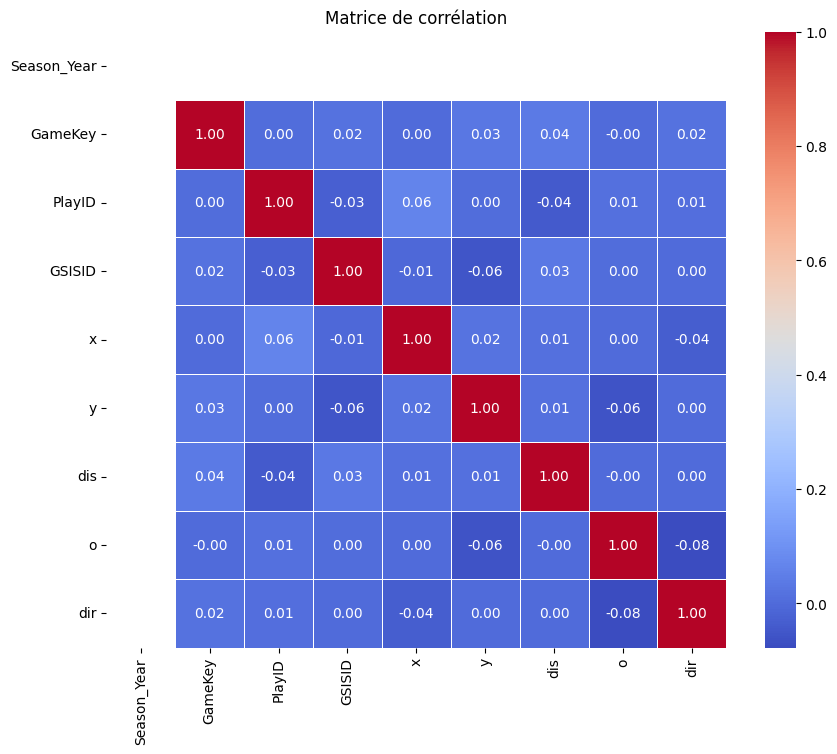

In [7]:
# Sélectionner les colonnes numériques
# Exclure les colonnes non numériques comme 'Event', 'Season_Year', etc.
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

Puisque le nombre des observation est énorme on va travailler sur un nombre des observation aseez petit ( n=10000)

In [8]:
import pandas as pd

# Tirage aléatoire de 10 000 observations
dfn = df.sample(n=10000, random_state=42)  # random_state pour reproductibilité
dfn = dfn.drop(columns=["Event"])

print(dfn.head())

        Season_Year  GameKey  PlayID  GSISID                     Time  \
139488         2017      656    1569   33512  2018-01-07 02:24:39.100   
543808         2017      659    2310   30443  2018-01-13 23:23:38.600   
414893         2017      655    1413   32820  2018-01-06 22:37:00.800   
946389         2017      659    1806   29955  2018-01-13 22:50:18.600   
321987         2017      660    3170   33911  2018-01-14 03:45:31.700   

                x          y   dis           o         dir  
139488  29.090000  18.290001  0.13   70.360001  167.800003  
543808  32.450001  30.750000  0.00  358.970001   41.340000  
414893  46.419998  24.620001  0.01  351.859985   71.309998  
946389  50.869999  20.469999  0.24  137.240005  266.769989  
321987  29.330000  37.349998  0.07  326.420013   28.809999  


1. Distribution des variables numériques (Histogrammes)

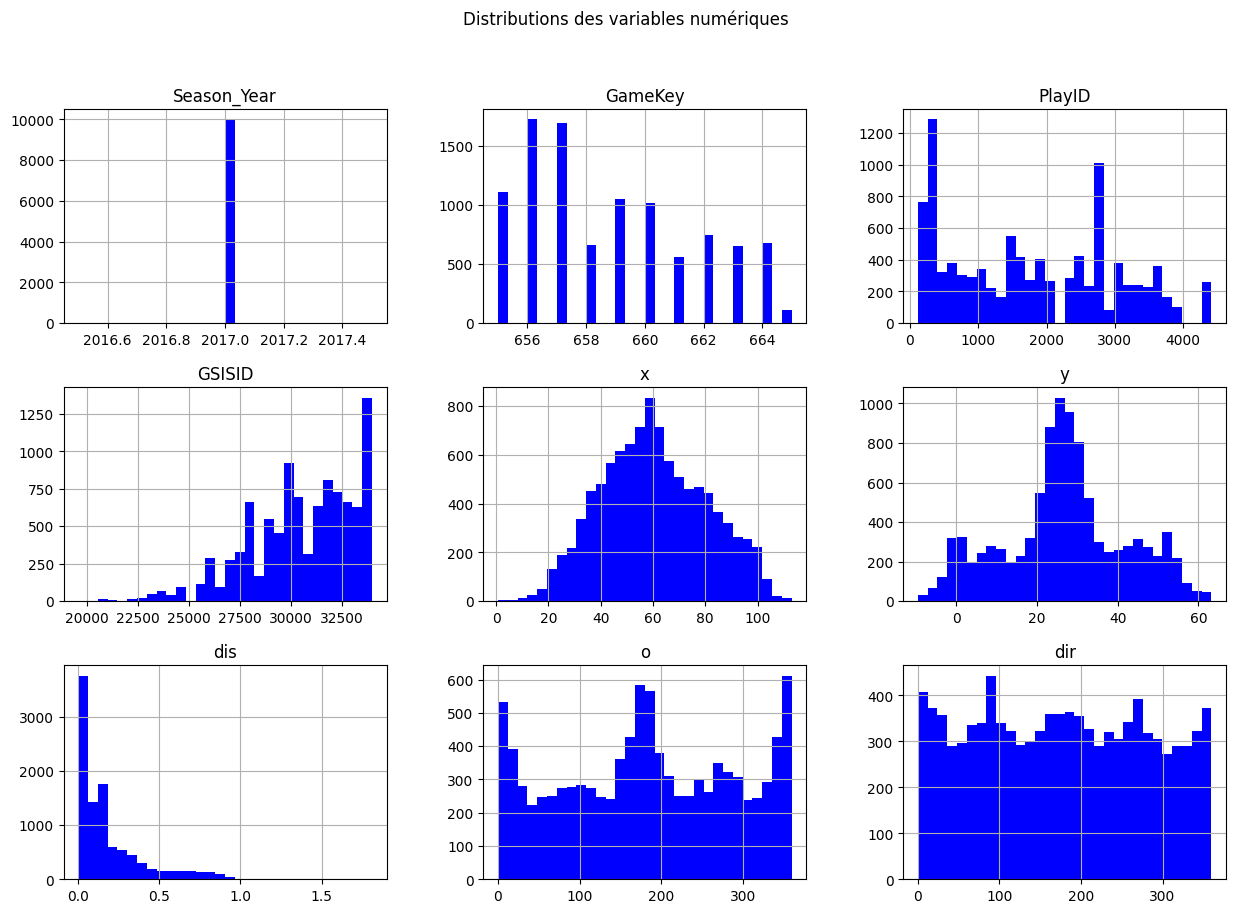

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
dfn_numeric = df_numeric.sample(n=10000, random_state=42)
# Afficher les histogrammes pour toutes les colonnes numériques
dfn_numeric.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle("Distributions des variables numériques")
plt.show()

2. Nuages de points (Scatter Plots)

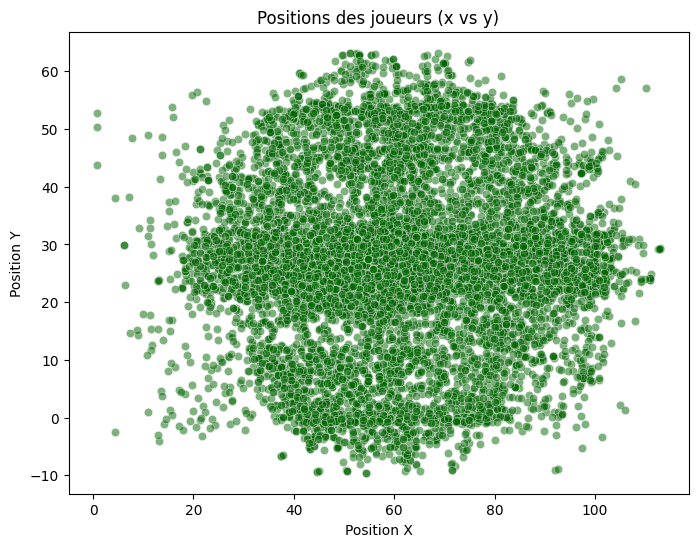

In [10]:
# Nuage de points entre 'x' et 'y' (positions sur le terrain)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dfn, alpha=0.5, color='darkgreen')
plt.title("Positions des joueurs (x vs y)")
plt.xlabel("Position X")
plt.ylabel("Position Y")
plt.show()

3. Visualisation des trajectoires (Line Plots)

Joueur sélectionné (GSISID): 28846
Match sélectionné (GameKey): 657
Jeu sélectionné (PlayID): 943


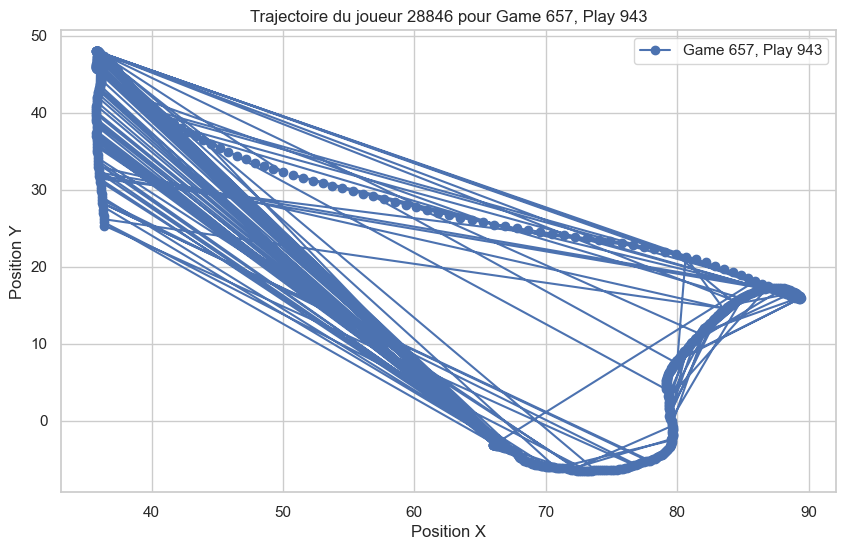

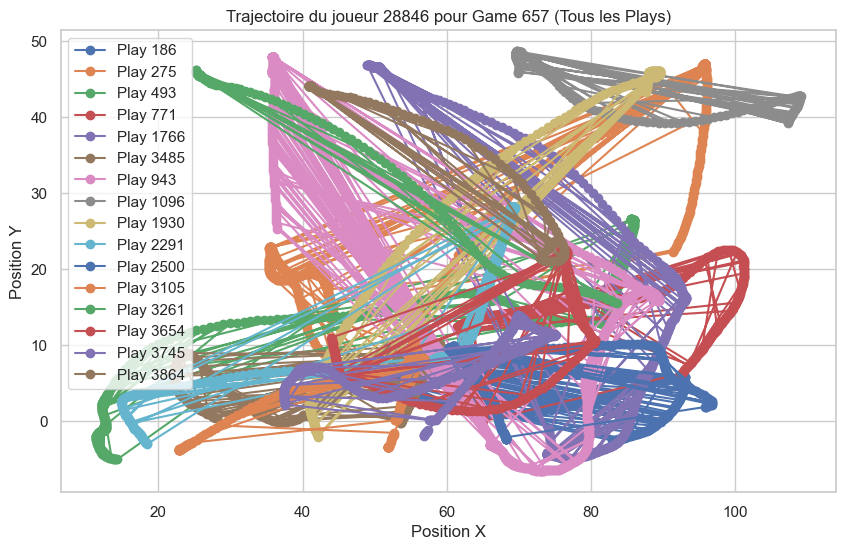

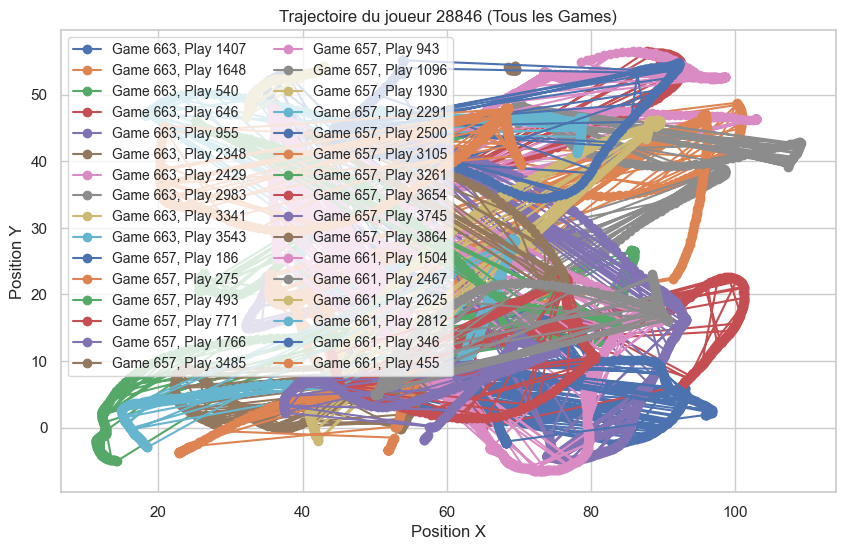

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

def plot_player_trajectories(df):
    """
    Sélectionne un joueur aléatoire, puis visualise :
    1. Son trajet pour un seul GameKey et un seul PlayID
    2. Son trajet pour un seul GameKey (tous les PlayID)
    3. Son trajet pour tous ses GameKey.
    """
    # Vérifier si le DataFrame est vide
    if df.empty:
        print("Le DataFrame est vide.")
        return
    
    # Sélection d'un joueur Exemple 28846 
    player_id = 28846
    player_df = df[df['GSISID'] == player_id]
    
    if player_df.empty:
        print(f"Aucune donnée trouvée pour le joueur {player_id}.")
        return
    
    # Sélection d'un GameKey aléatoire parmi ceux du joueur
    game_key = random.choice(player_df['GameKey'].unique())
    game_df = player_df[player_df['GameKey'] == game_key]
    
    # Sélection d'un PlayID aléatoire parmi ceux du joueur dans ce GameKey
    play_id = random.choice(game_df['PlayID'].unique())
    play_df = game_df[game_df['PlayID'] == play_id]
    
    print(f"Joueur sélectionné (GSISID): {player_id}")
    print(f"Match sélectionné (GameKey): {game_key}")
    print(f"Jeu sélectionné (PlayID): {play_id}")

    # Configuration du style
    sns.set(style="whitegrid")

    # ======= 1. Visualisation pour un seul GameKey & un seul PlayID =======
    plt.figure(figsize=(10, 6))
    plt.plot(play_df['x'], play_df['y'], marker='o', linestyle='-', color='b', label=f'Game {game_key}, Play {play_id}')
    plt.xlabel('Position X')
    plt.ylabel('Position Y')
    plt.title(f'Trajectoire du joueur {player_id} pour Game {game_key}, Play {play_id}')
    plt.legend()
    plt.show()

    # ======= 2. Visualisation pour un seul GameKey (tous les PlayID) =======
    plt.figure(figsize=(10, 6))
    for play in game_df['PlayID'].unique():
        subset = game_df[game_df['PlayID'] == play]
        plt.plot(subset['x'], subset['y'], marker='o', linestyle='-', label=f'Play {play}')
    plt.xlabel('Position X')
    plt.ylabel('Position Y')
    plt.title(f'Trajectoire du joueur {player_id} pour Game {game_key} (Tous les Plays)')
    plt.legend()
    plt.show()

    # ======= 3. Visualisation pour tous les GameKey =======
    plt.figure(figsize=(10, 6))
    for game in player_df['GameKey'].unique():
        for play in player_df[player_df['GameKey'] == game]['PlayID'].unique():
            subset = player_df[(player_df['GameKey'] == game) & (player_df['PlayID'] == play)]
            plt.plot(subset['x'], subset['y'], marker='o', linestyle='-', label=f'Game {game}, Play {play}')
    plt.xlabel('Position X')
    plt.ylabel('Position Y')
    plt.title(f'Trajectoire du joueur {player_id} (Tous les Games)')
    plt.legend(loc='best', fontsize='small', ncol=2, frameon=True)
    plt.show()

# Exemple d'utilisation
plot_player_trajectories(df)



4. Boîtes à moustaches (Boxplots)

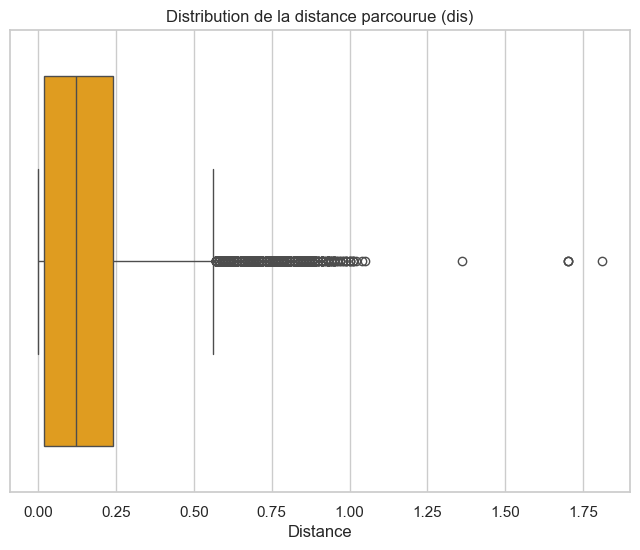

In [12]:
# Boîte à moustaches pour la distance parcourue ('dis')
plt.figure(figsize=(8, 6))
sns.boxplot(x=dfn['dis'], color='orange')
plt.title("Distribution de la distance parcourue (dis)")
plt.xlabel("Distance")
plt.show()

6. Visualisation des directions (Rose des vents)

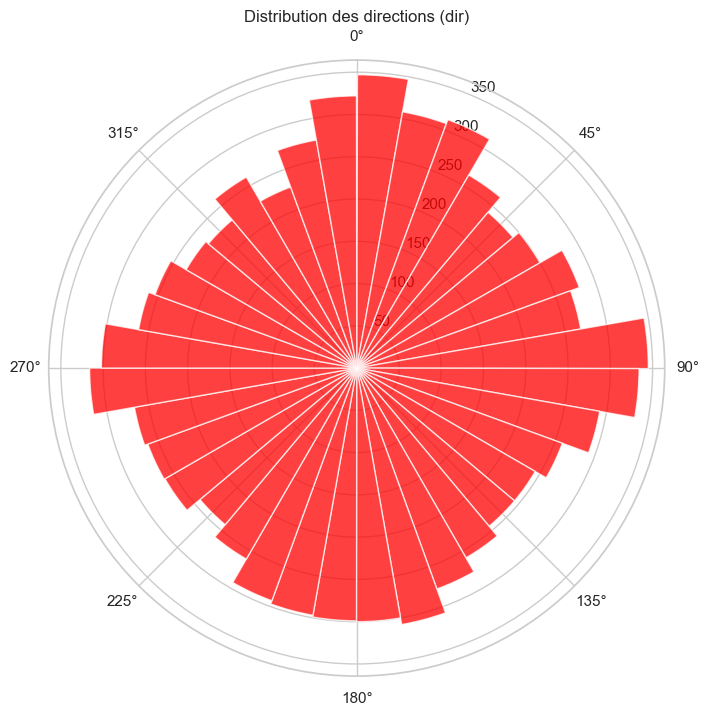

In [13]:
import numpy as np

# Convertir les directions en radians pour la visualisation
directions = np.deg2rad(dfn['dir'])

# Tracer la rose des vents
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.hist(directions, bins=36, color='red', alpha=0.75)
ax.set_theta_zero_location('N')  # Nord en haut
ax.set_theta_direction(-1)  # Sens horaire
plt.title("Distribution des directions (dir)")
plt.show()

7. Pairplot (Relations entre toutes les variables numériques)

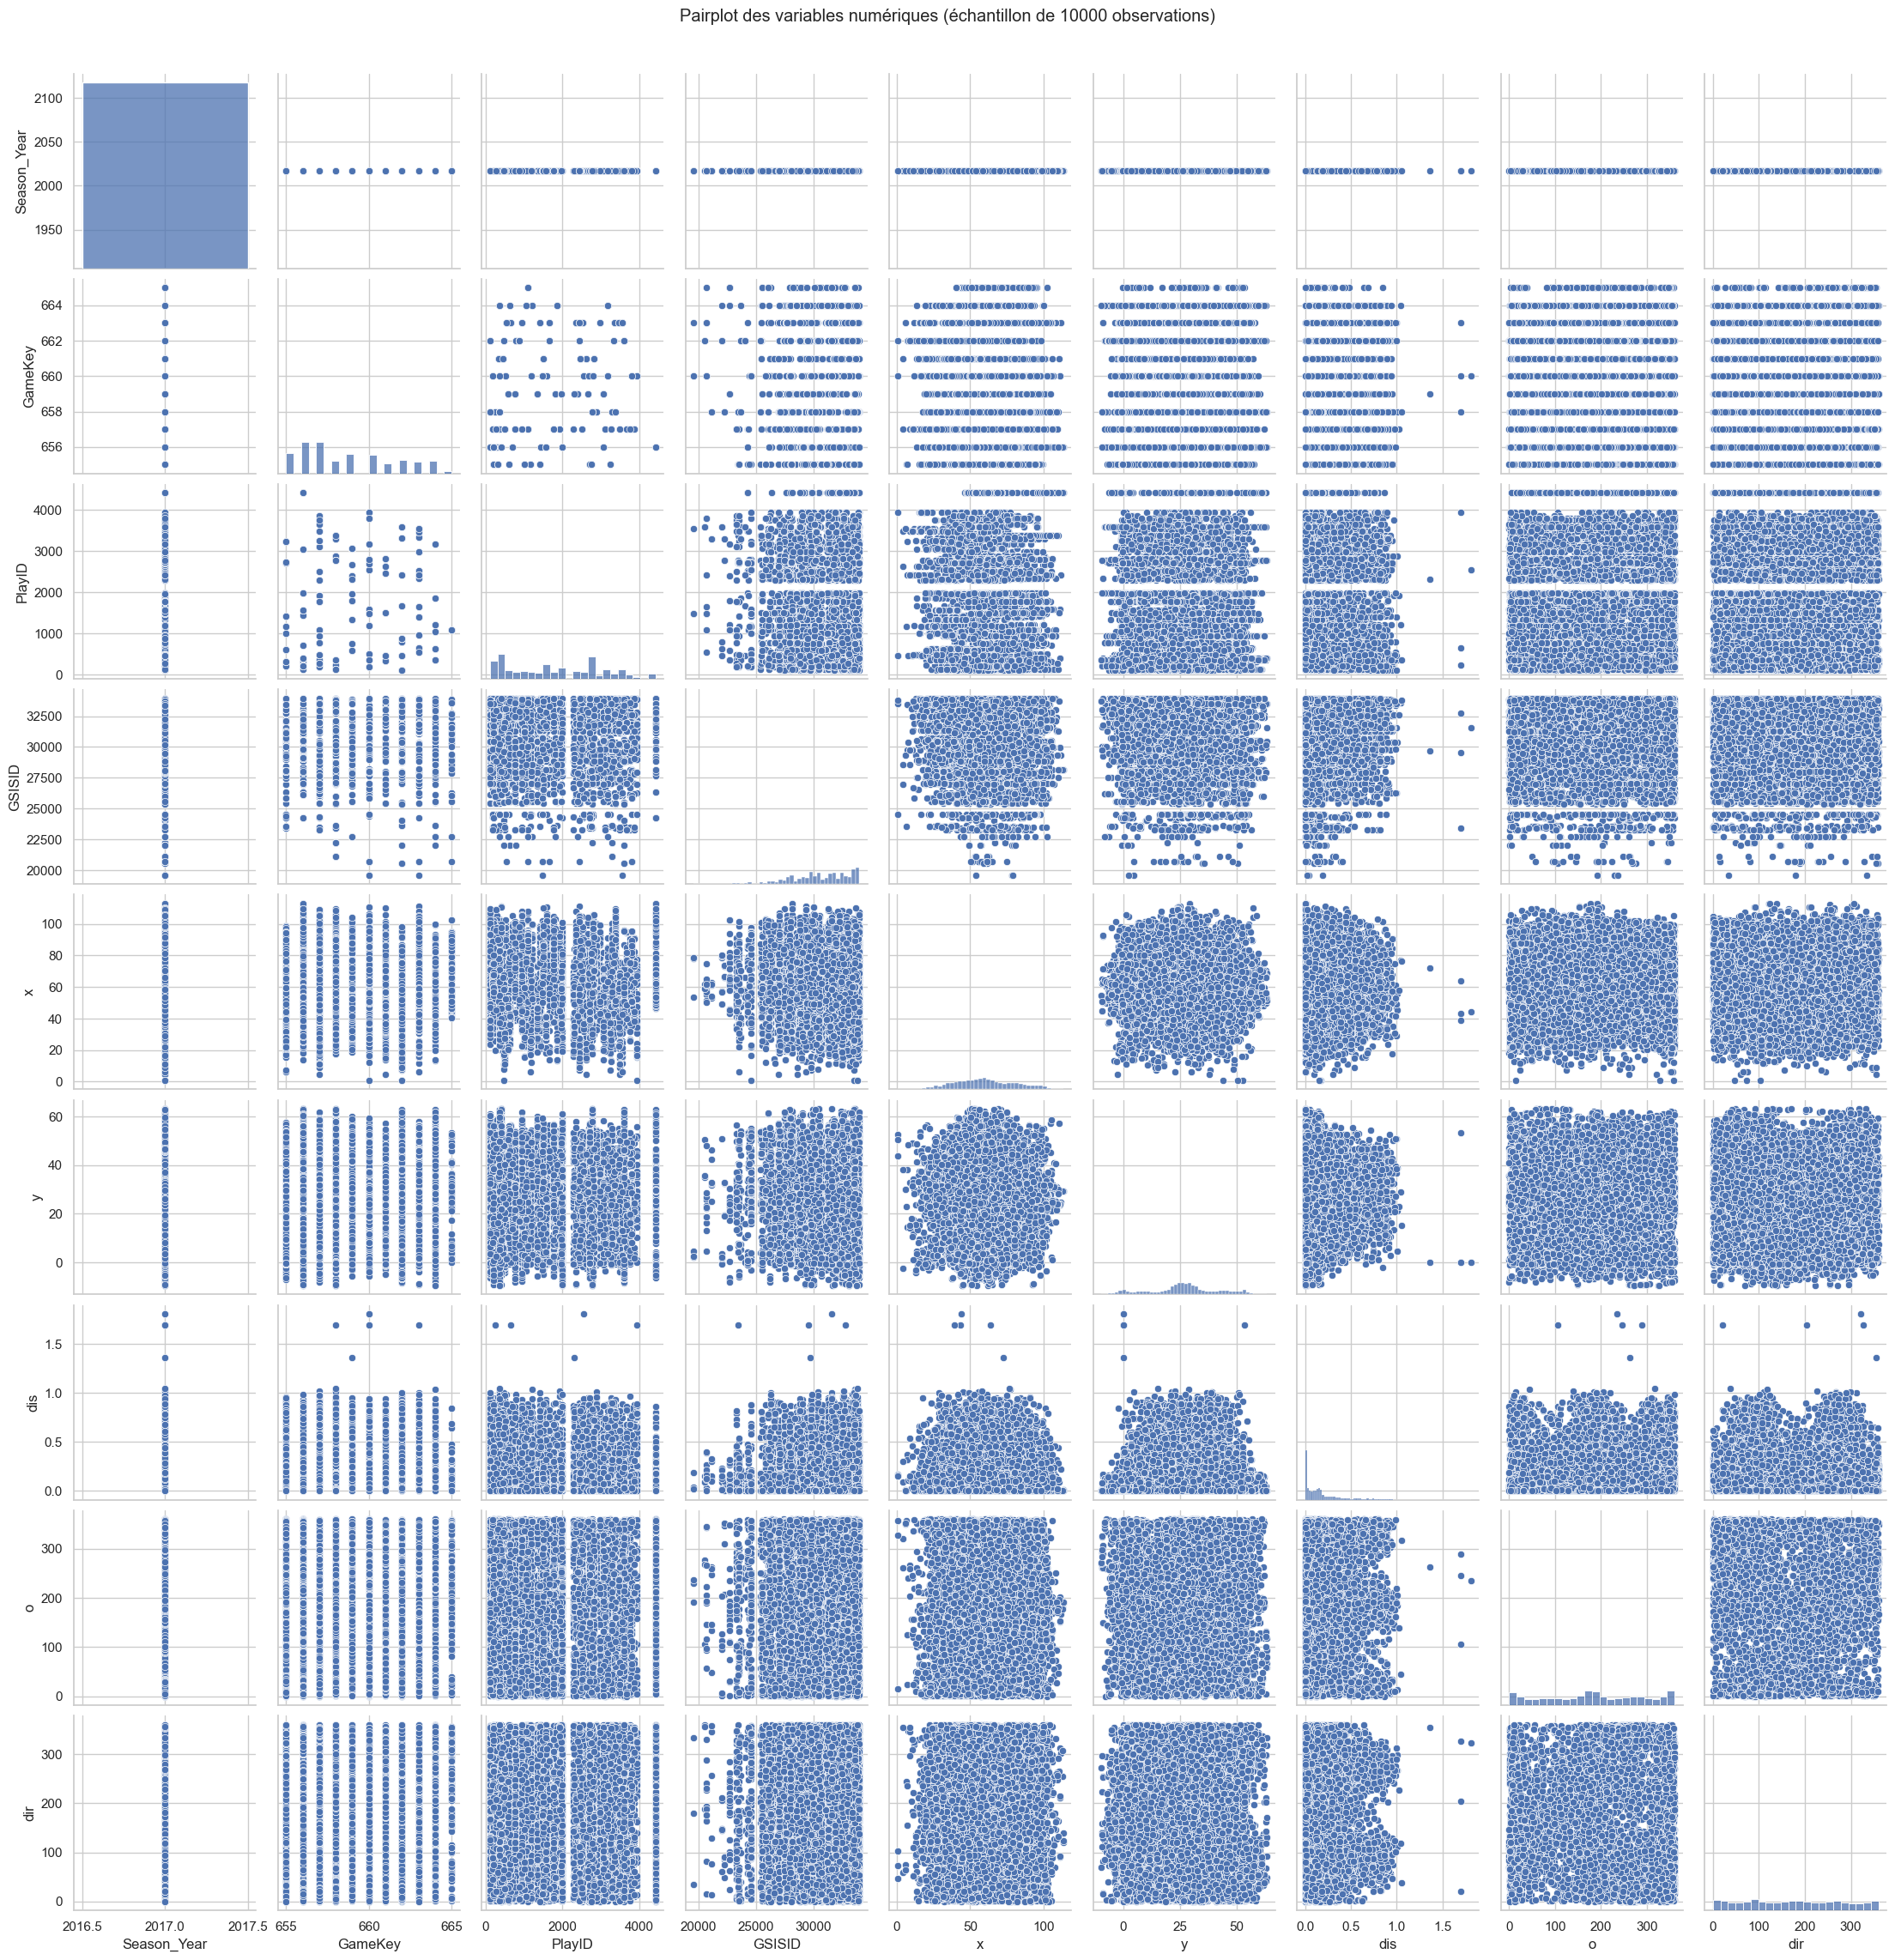

In [14]:
sns.pairplot(dfn)
plt.suptitle(f"Pairplot des variables numériques (échantillon de 10000 observations)", y=1.02)
plt.show()

# L'autocorrélation Spatiale

## Matrice de poids spatiaux

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


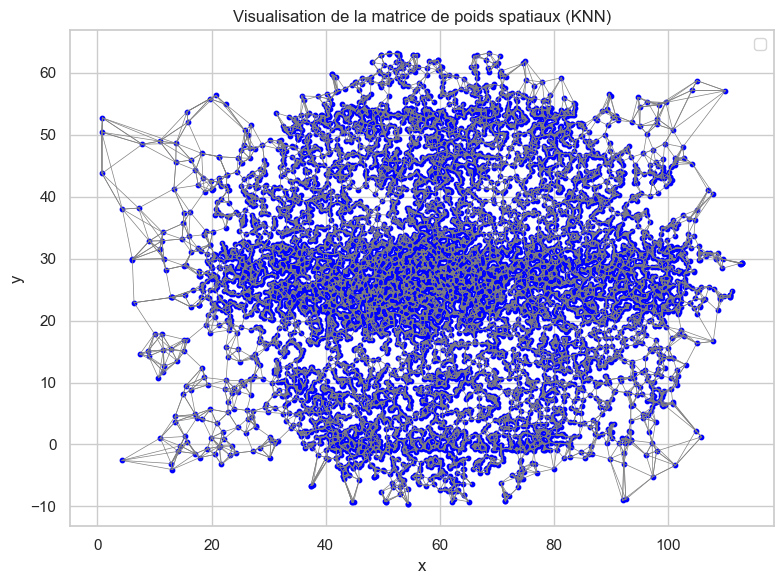

In [15]:
import libpysal
import matplotlib.pyplot as plt

# Créer un GeoDataFrame à partir des coordonnées (x, y)
geometry = [Point(xy) for xy in zip(dfn['x'], dfn['y'])]
gdf = gpd.GeoDataFrame(dfn, geometry=geometry)

# ---------------------------------------------------
# 2. Matrice de poids spatiaux (seuil de distance ou KNN)
# ---------------------------------------------------
coordinates = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))

w = KNN.from_array(coordinates, k=5)
w.transform = 'r'

# Visualisation de la matrice de poids spatiaux
fig, ax = plt.subplots(figsize=(8, 6))

# Afficher les points
ax.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=10)

# Afficher les lignes entre les voisins (liens KNN)
for i, neighbors in w.neighbors.items():
    for j in neighbors:
        x0, y0 = coordinates[i]
        x1, y1 = coordinates[j]
        ax.plot([x0, x1], [y0, y1], color='gray', linewidth=0.5)

ax.set_title("Visualisation de la matrice de poids spatiaux (KNN)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Indice de Moran et Geary

Indice de Moran : 0.2868 (p-value : 0.0020)
Indice de Geary : 0.6503 (p-value : 0.0020)


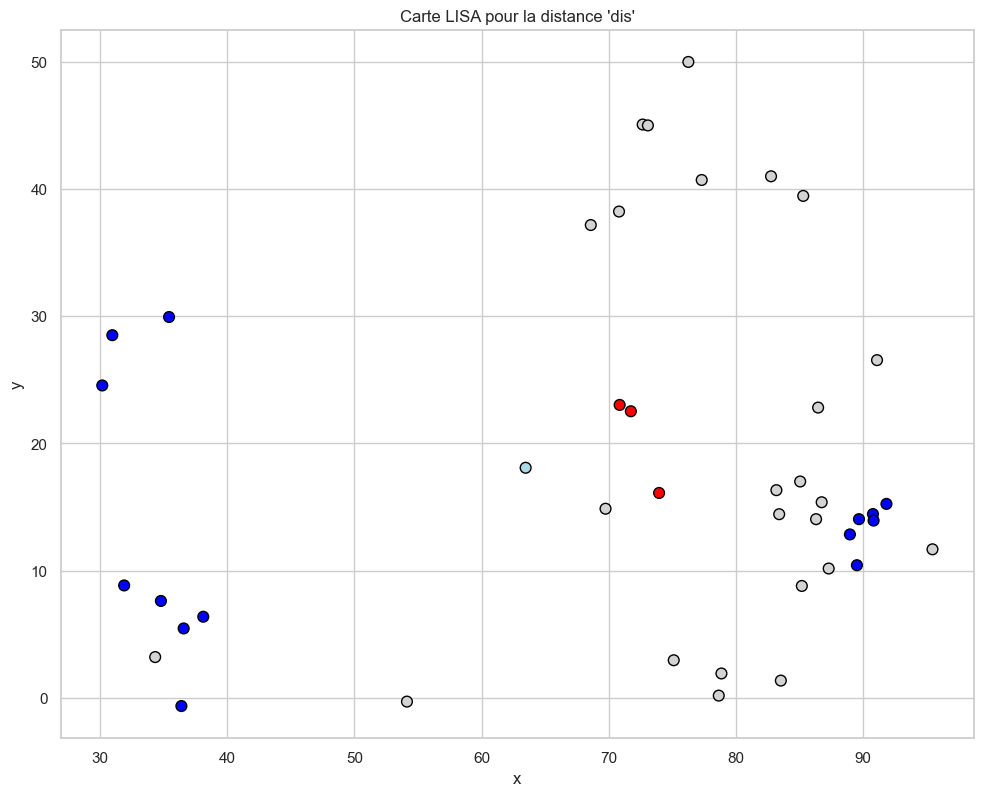

In [16]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import pandas as pd
from libpysal.weights import KNN
from esda.moran import Moran, Moran_Local
from esda.geary import Geary
import matplotlib.pyplot as plt

# 1. Sélectionner un PlayID
play_id = dfn['PlayID'].unique()[0]
df_play = dfn[dfn['PlayID'] == play_id].copy()

# 2. Garder la dernière position de chaque joueur (par exemple le dernier instant du jeu)
df_play['Time'] = pd.to_datetime(df_play['Time'])
df_latest = df_play.sort_values('Time').groupby('GSISID').tail(1).reset_index(drop=True)

# 3. Créer GeoDataFrame
geometry = [Point(xy) for xy in zip(df_latest['x'], df_latest['y'])]
gdf = gpd.GeoDataFrame(df_latest, geometry=geometry)

# 4. Matrice de poids spatiaux KNN
coordinates = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))
w = KNN.from_array(coordinates, k=5)
w.transform = 'r'

# 5. Variable à analyser : dis (la distance que tu as calculée)
y = gdf['dis'].values

# 6. Indice de Moran et de Geary
moran = Moran(y, w)
geary = Geary(y, w)

print(f"Indice de Moran : {moran.I:.4f} (p-value : {moran.p_sim:.4f})")
print(f"Indice de Geary : {geary.C:.4f} (p-value : {geary.p_sim:.4f})")

# 7. LISA (Moran Local)
lisa = Moran_Local(y, w)

# 8. Carte LISA
gdf['LISA_cluster'] = lisa.q
gdf['LISA_signif'] = lisa.p_sim < 0.05

# Couleurs pour les 4 types de clusters LISA
colors_dict = {
    1: 'red',         # High-High
    2: 'lightblue',   # Low-High
    3: 'blue',        # Low-Low
    4: 'pink'         # High-Low
}
gdf['color'] = gdf.apply(lambda row: colors_dict[row.LISA_cluster] if row.LISA_signif else 'lightgrey', axis=1)

# 9. Affichage
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color=gdf['color'], markersize=60, edgecolor='black')
ax.set_title("Carte LISA pour la distance 'dis'")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.grid(True)
plt.tight_layout()
plt.show()


# Les Modèles Spatiaux

In [17]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from libpysal.weights import KNN
from spreg import OLS, GM_Lag, GM_Error
import matplotlib.pyplot as plt

# 1. Filtrer un jeu (PlayID)
play_id = dfn['PlayID'].unique()[0]
df_play = dfn[dfn['PlayID'] == play_id].copy()
df_play['Time'] = pd.to_datetime(df_play['Time'])
df_latest = df_play.sort_values('Time').groupby('GSISID').tail(1).reset_index(drop=True)

# 2. Créer GeoDataFrame
geometry = [Point(xy) for xy in zip(df_latest['x'], df_latest['y'])]
gdf = gpd.GeoDataFrame(df_latest, geometry=geometry)

# 3. Matrice de poids spatiaux (KNN)
coords = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))
w = KNN.from_array(coords, k=5)
w.transform = 'r'

# 4. Préparation des données pour régression
y = gdf['dis'].values.reshape((-1, 1))
# Exemple : on utilise `dir` et `o` comme variables explicatives (à adapter selon tes données)
X = gdf[['x', 'y']].fillna(0).values


## Modele de regression linéaire OLS

In [18]:
ols_model = OLS(y, X, name_y='dis', name_x=['x', 'oy'])
print(ols_model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :         dis                Number of Observations:          43
Mean dependent var  :      0.2214                Number of Variables   :           3
S.D. dependent var  :      0.1935                Degrees of Freedom    :          40
R-squared           :      0.0576
Adjusted R-squared  :      0.0105
Sum squared residual:     1.48138                F-statistic           :      1.2223
Sigma-square        :       0.037                Prob(F-statistic)     :      0.3053
S.E. of regression  :       0.192                Log likelihood        :      11.403
Sigma-square ML     :       0.034                Akaike info criterion :     -16.805
S.E of regression ML:      0.1856                Schwarz criterion     :     -11.521

------------------------------------------------------------

**SAR**

In [19]:
sar_model = GM_Lag(y, X, w=w, name_y='dis', name_x=['dir', 'o'])
print(sar_model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :         dis                Number of Observations:          43
Mean dependent var  :      0.2214                Number of Variables   :           4
S.D. dependent var  :      0.1935                Degrees of Freedom    :          39
Pseudo R-squared    :      0.2311
Spatial Pseudo R-squared: omitted due to rho outside the boundary (-1, 1).

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        -0.07913         0.11937        -0.66284         0.50743
                 dir        -0.00045         0.00163        -0.27540         0.78301
 

**Modèle de régression spatiale de type Error (SEM)**

In [20]:
sem_model = GM_Error(y, X, w=w, name_y='dis', name_x=['dir', 'o'])
print(sem_model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES
------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :         dis                Number of Observations:          43
Mean dependent var  :      0.2214                Number of Variables   :           3
S.D. dependent var  :      0.1935                Degrees of Freedom    :          40
Pseudo R-squared    :      0.0488

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.12243         0.18982         0.64496         0.51895
                 dir         0.00150         0.00244         0.61524         0.53839
                   o         0.00030         0.00321         0.09354

**SLX**

In [21]:
from spreg import GM_Error

# Estimation du modèle SLX
slx_model = GM_Error(
    y, X, w=w,
    slx_lags=1,
    slx_vars='all',
    name_y='dis',
    name_x=['dir', 'o']
)

# Affichage du résumé du modèle
print(slx_model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES WITH SLX (SLX-Error)
---------------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :         dis                Number of Observations:          43
Mean dependent var  :      0.2214                Number of Variables   :           5
S.D. dependent var  :      0.1935                Degrees of Freedom    :          38
Pseudo R-squared    :      0.2736

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.07659         0.11984         0.63909         0.52277
                 dir        -0.01878         0.00727        -2.58527         0.00973
                   o      

**Modèle de régression géographiquement pondérée (GWR)**

In [22]:
from mgwr.gwr import GWR
import numpy as np



# Définir les coordonnées spatiales
coords = list(zip(dfn['x'], dfn['y']))

# Définir la variable cible (y) et les variables explicatives (X)
y = dfn['dis'].values.reshape(-1, 1)  # Variable cible (distance parcourue)
X = dfn[['x', 'y', 'o', 'dir']].values  # Variables explicatives

# Définir une bande passante fixe (par exemple, 50)
bw = 50

# Appliquer le modèle GWR
gwr_model = GWR(coords, y, X, bw)
results = gwr_model.fit()

# Afficher les résultats
print(results.summary())

Model type                                                         Gaussian
Number of observations:                                               10000
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            448.745
Log-likelihood:                                                    1330.040
AIC:                                                              -2650.080
AICc:                                                             -2648.071
BIC:                                                             -91608.607
R2:                                                                   0.000
Adj. R2:                                                              0.000

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

# Krigeage 

## Krigeage Ordinair 

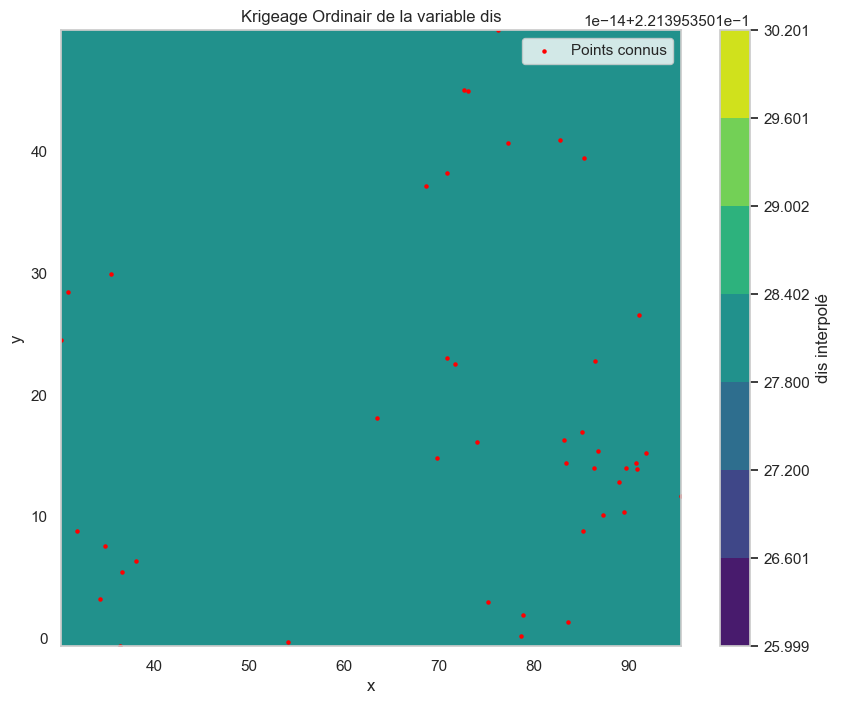

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from mpl_toolkits.mplot3d import Axes3D



x = df_latest['x'].values
y = df_latest['y'].values
z = df_latest['dis'].values  # Variable à interpoler

# Création du maillage pour l'interpolation
gridx = np.linspace(x.min(), x.max(), 100)
gridy = np.linspace(y.min(), y.max(), 100)

# Krigeage ordinaire
OK = OrdinaryKriging(x, y, z, variogram_model='linear', verbose=False, enable_plotting=False)
z_interp, ss = OK.execute('grid', gridx, gridy)

# Affichage de la surface interpolée
plt.figure(figsize=(10, 8))
plt.contourf(gridx, gridy, z_interp, cmap='viridis')
plt.colorbar(label='dis interpolé')
plt.scatter(x, y, c='red', s=5, label='Points connus')
plt.legend()
plt.title('Krigeage Ordinair de la variable dis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


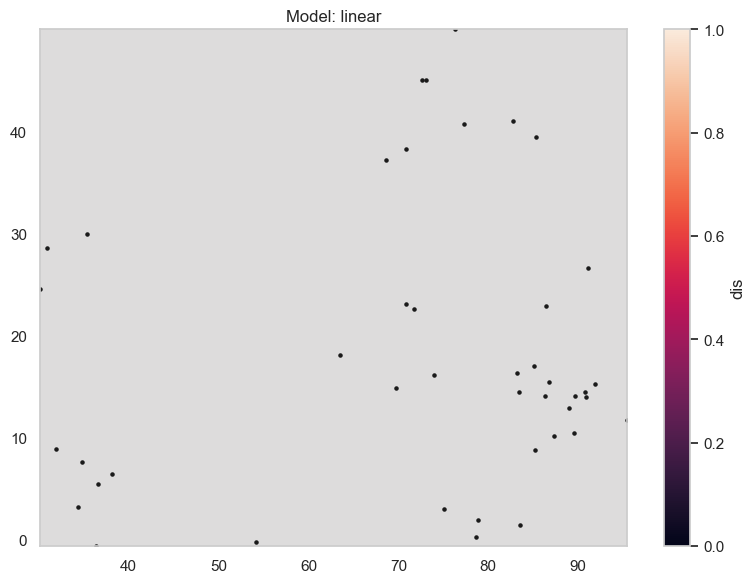

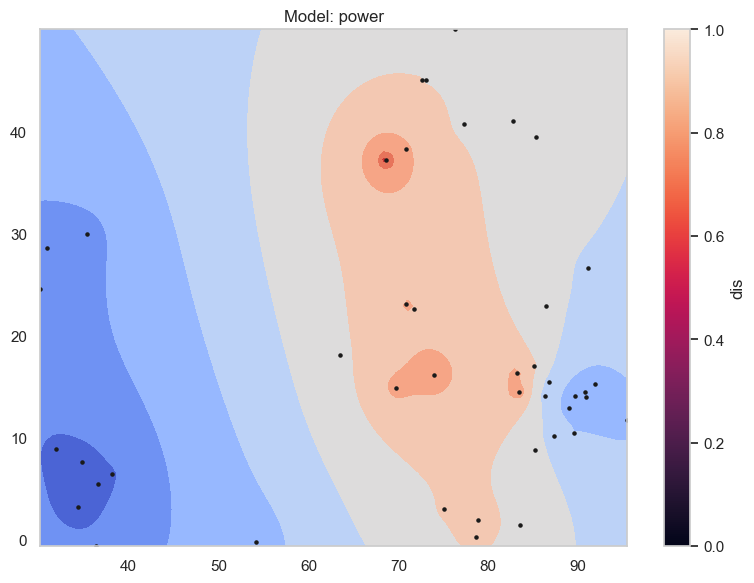

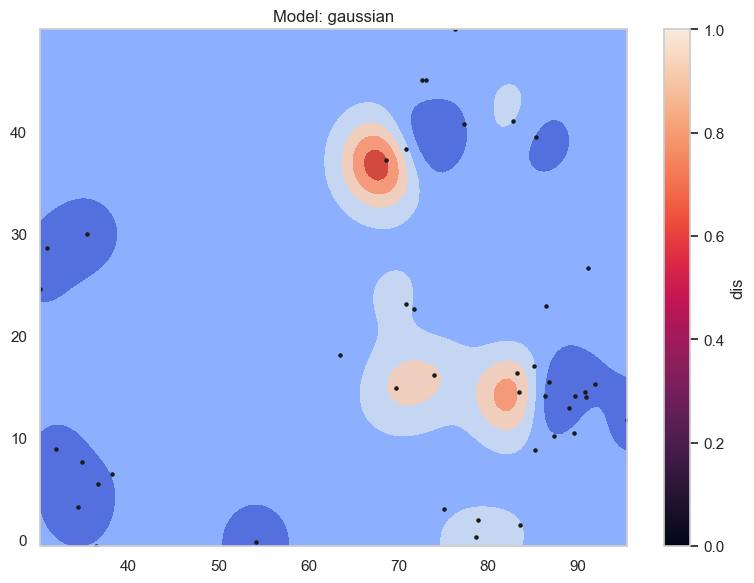

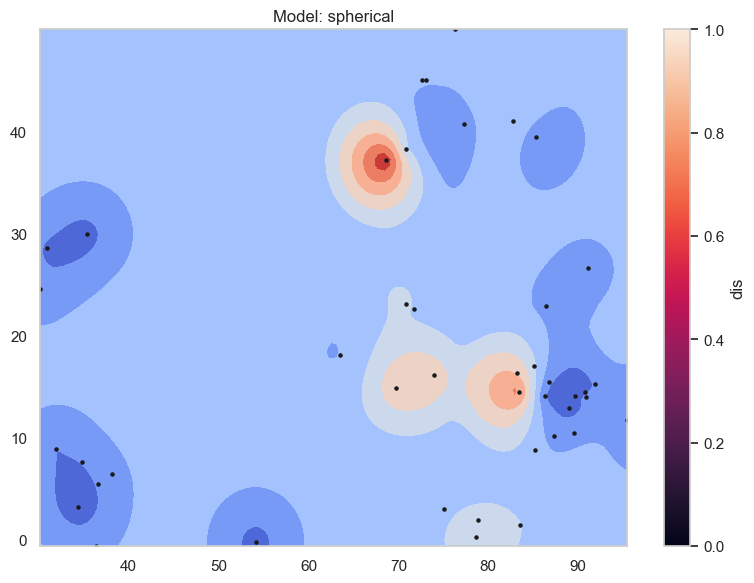

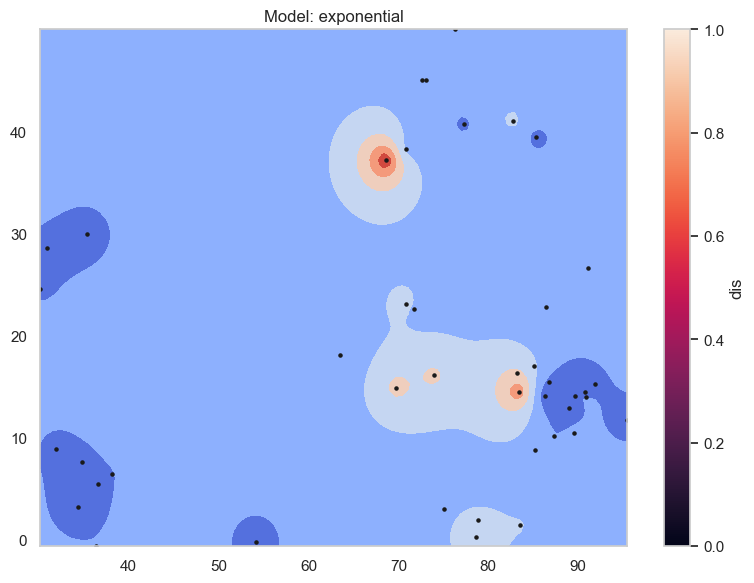

In [24]:
variogram_models = ['linear', 'power', 'gaussian', 'spherical', 'exponential']

for model in variogram_models:
    OK = OrdinaryKriging(x, y, z, variogram_model=model)
    z_interp, _ = OK.execute('grid', gridx, gridy)

    plt.figure(figsize=(8,6))
    plt.contourf(gridx, gridy, z_interp, cmap='coolwarm')
    plt.scatter(x, y, c='k', s=5)
    plt.title(f"Model: {model}")
    plt.colorbar(label='dis')
    plt.tight_layout()
    plt.show()


# Spatio-temporelle 

## Visualisation des données spatio-temporelle 

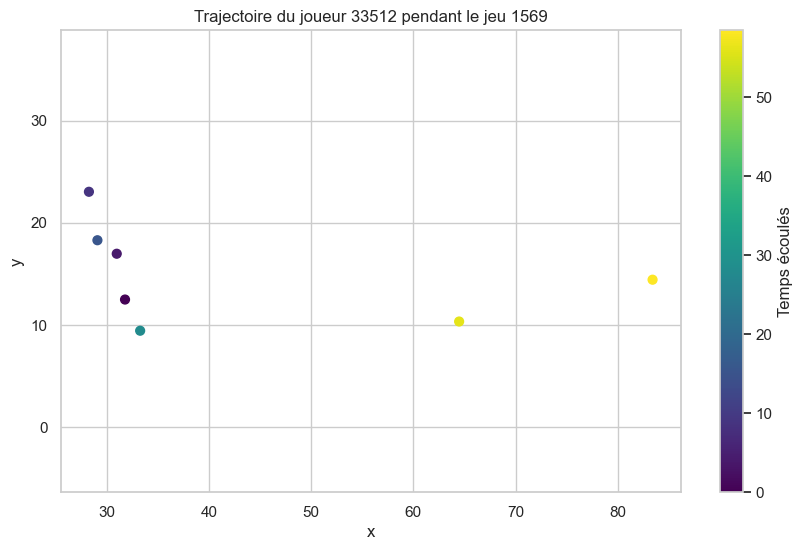

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sélectionner un joueur
player_id = dfn['GSISID'].unique()[0]

# Sélectionner un jeu spécifique où ce joueur a joué
sub_df = dfn[dfn['GSISID'] == player_id]
play_id = sub_df['PlayID'].unique()[0]

# Filtrer pour ce joueur et ce jeu uniquement
df_one_play = sub_df[sub_df['PlayID'] == play_id].copy()

# Convertir le temps
df_one_play['Time'] = pd.to_datetime(df_one_play['Time'])
df_one_play['elapsed_seconds'] = (df_one_play['Time'] - df_one_play['Time'].min()).dt.total_seconds()

# Visualisation : trajectoire colorée par le temps
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_one_play['x'], df_one_play['y'],
    c=df_one_play['elapsed_seconds'],
    cmap='viridis', s=40
)
plt.colorbar(scatter, label="Temps écoulés")
plt.title(f"Trajectoire du joueur {player_id} pendant le jeu {play_id}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('equal')
plt.show()



## Modélisation spatio-temporelle 

## Modele STAR

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     20.75
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.67e-06
Time:                        12:30:51   Log-Likelihood:                 30.134
No. Observations:                  35   AIC:                            -54.27
Df Residuals:                      32   BIC:                            -49.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0334      0.021      1.619      0.1

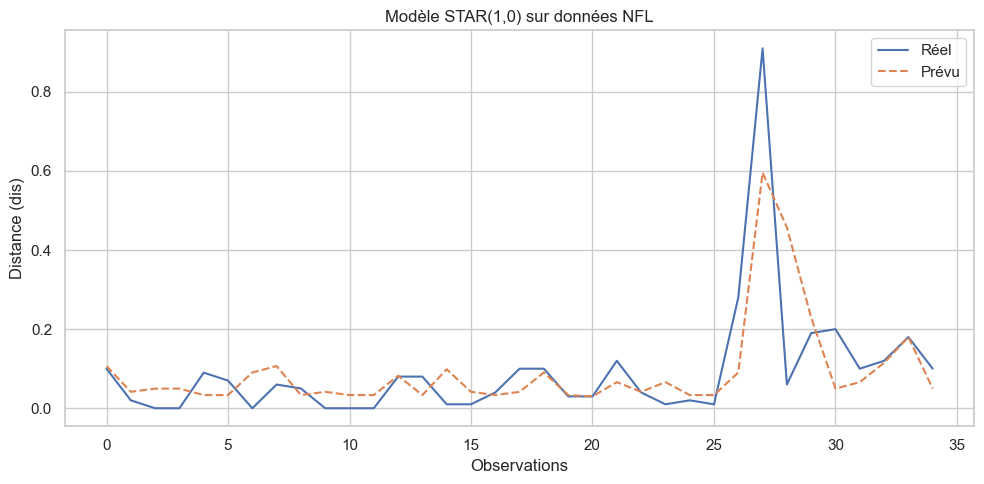

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from libpysal.weights import DistanceBand
import matplotlib.pyplot as plt

# 1. Filtrer un seul match (PlayID) avec plusieurs joueurs (GSISID)
play_id = dfn['PlayID'].unique()[0]
df = dfn[dfn['PlayID'] == play_id].copy()

# 2. Préparer le temps
df['Time'] = pd.to_datetime(df['Time'])
df = df.sort_values(['Time', 'GSISID'])
df['elapsed'] = (df['Time'] - df['Time'].min()).dt.total_seconds()

# 3. Initialiser les listes pour les variables STAR
Y_target = []
Y_lag = []
WY_lag = []

# 4. Construire le modèle STAR(1,0)
for t in sorted(df['elapsed'].unique())[1:]:  # sauter t=0 pour le lag
    df_t = df[df['elapsed'] == t].copy()
    df_t1 = df[df['elapsed'] == t - 1].copy()  # t-1

    if len(df_t) != len(df_t1):  # assurer même nombre de joueurs
        continue

    # Aligner les joueurs
    df_t = df_t.sort_values('GSISID').reset_index(drop=True)
    df_t1 = df_t1.sort_values('GSISID').reset_index(drop=True)

    # Distance à t
    y_t = df_t['dis'].values
    y_t1 = df_t1['dis'].values

    # Coordonnées spatiales à t-1
    coords = df_t1[['x', 'y']].values
    W = DistanceBand(coords, threshold=10, binary=True, silence_warnings=True)
    W.transform = 'r'

    wy_t1 = W.sparse.dot(y_t1)

    Y_target.extend(y_t)
    Y_lag.extend(y_t1)
    WY_lag.extend(wy_t1)

# 5. Régression STAR(1,0)
X = pd.DataFrame({
    'const': 1,
    'y_lag': Y_lag,
    'wy_lag': WY_lag
})
Y = np.array(Y_target)

model = sm.OLS(Y, X).fit()
print(model.summary())

# 6. Visualisation prédiction vs réel
y_pred = model.predict(X)

plt.figure(figsize=(10, 5))
plt.plot(Y[:100], label="Réel")
plt.plot(y_pred[:100], label="Prévu", linestyle='--')
plt.xlabel("Observations")
plt.ylabel("Distance (dis)")
plt.title("Modèle STAR(1,0) sur données NFL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Modèle STSLM

In [27]:
from libpysal.weights import DistanceBand
import pandas as pd
import statsmodels.api as sm
from spreg import ML_Lag
import numpy as np

# 1. Filtrer un joueur et un match
df = dfn[(dfn['PlayID'] == dfn['PlayID'].unique()[0]) & 
         (dfn['GSISID'] == dfn['GSISID'].unique()[0])].copy()
df = df.sort_values('Time')
df['Time'] = pd.to_datetime(df['Time'])
df['elapsed_sec'] = (df['Time'] - df['Time'].min()).dt.total_seconds()

# 2. Ajouter des retards temporels
df['dis_lag'] = df['dis'].shift(1)
df['elapsed_lag'] = df['elapsed_sec'].shift(1)

# 3. Supprimer les NA
df_model = df.dropna().copy()

# 4. Créer la matrice de voisinage spatiale
coords = df_model[['x', 'y']].values
W = DistanceBand(coords, threshold=5, binary=True)
W.transform = 'r'  # normalisation ligne

# 5. Définir y et X
y = df_model['dis'].values.reshape(-1, 1)
X = df_model[['dis_lag', 'elapsed_lag']].values

# 6. STSLM ≈ SLM + lag temporels → ML_Lag
model = ML_Lag(y, X, w=W, name_y='dis', name_x=['dis_lag', 'elapsed_lag'])

# 7. Résumé
print(model.summary)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :         dis                Number of Observations:           6
Mean dependent var  :      0.3433                Number of Variables   :           4
S.D. dependent var  :      0.3796                Degrees of Freedom    :           2
Pseudo R-squared    :      0.7946
Spatial Pseudo R-squared:  0.8092
Log likelihood      :      2.4629
Sigma-square ML     :      0.0247                Akaike info criterion :       3.074
S.E of regression   :      0.1571                Schwarz criterion     :       2.241

------------------------------------------------------------------------------------
 

C:\Users\ZAYED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 3, 4, 5.
  w = W(neighbors, weights, ids, **kwargs)
C:\Users\ZAYED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 3, 4, 5.
  W.__init__(


## Modèle SDM

In [28]:
from libpysal.weights import DistanceBand
import pandas as pd
import statsmodels.api as sm
from spreg import ML_Lag
import numpy as np

# Suppose que tu as déjà filtré un joueur et un match :
df = dfn[(dfn['PlayID'] == dfn['PlayID'].unique()[0]) & (dfn['GSISID'] == dfn['GSISID'].unique()[0])].copy()
df = df.sort_values('Time')
df['Time'] = pd.to_datetime(df['Time'])
df['elapsed_sec'] = (df['Time'] - df['Time'].min()).dt.total_seconds()

# Lags
df['dis_lag'] = df['dis'].shift(1)
df['elapsed_lag'] = df['elapsed_sec'].shift(1)

# Supprimer les lignes NA
df_model = df.dropna().copy()

# ✅ Construire W après nettoyage
coords = df_model[['x', 'y']].values
W = DistanceBand(coords, threshold=5, binary=True)
W.transform = 'r'

# Variables
y = df_model['dis'].values.reshape(-1, 1)
X = df_model[['dis_lag', 'elapsed_lag']].values

# ✅ Modèle STAR (Spatial Lag Model, type Anselin)
model = ML_Lag(y, X, w=W, name_y='dis', name_x=['dis_lag', 'elapsed_lag'])

# Affichage
print(model.summary)



('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :         dis                Number of Observations:           6
Mean dependent var  :      0.3433                Number of Variables   :           4
S.D. dependent var  :      0.3796                Degrees of Freedom    :           2
Pseudo R-squared    :      0.7946
Spatial Pseudo R-squared:  0.8092
Log likelihood      :      2.4629
Sigma-square ML     :      0.0247                Akaike info criterion :       3.074
S.E of regression   :      0.1571                Schwarz criterion     :       2.241

------------------------------------------------------------------------------------
 

C:\Users\ZAYED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 3, 4, 5.
  w = W(neighbors, weights, ids, **kwargs)
C:\Users\ZAYED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 3, 4, 5.
  W.__init__(


## SEMs (Spatial Error Models)

In [29]:
from libpysal.weights import DistanceBand
import pandas as pd
import numpy as np
from spreg import ML_Error

# 1. Filtrer un joueur et un match
df = dfn[(dfn['PlayID'] == dfn['PlayID'].unique()[0]) & 
         (dfn['GSISID'] == dfn['GSISID'].unique()[0])].copy()
df = df.sort_values('Time')
df['Time'] = pd.to_datetime(df['Time'])
df['elapsed_sec'] = (df['Time'] - df['Time'].min()).dt.total_seconds()

# 2. Ajouter des variables temporelles retardées
df['dis_lag'] = df['dis'].shift(1)
df['elapsed_lag'] = df['elapsed_sec'].shift(1)

# 3. Supprimer les NA
df_model = df.dropna().copy()

# 4. Créer la matrice spatiale
coords = df_model[['x', 'y']].values
W = DistanceBand(coords, threshold=5, binary=True)
W.transform = 'r'

# 5. Préparer les données
y = df_model['dis'].values.reshape(-1, 1)
X = df_model[['dis_lag', 'elapsed_lag']].values

# 6. Modèle Spatial Error
model = ML_Error(y, X, w=W, name_y='dis', name_x=['dis_lag', 'elapsed_lag'])

# 7. Résumé du modèle
print(model.summary)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :         dis                Number of Observations:           6
Mean dependent var  :      0.3433                Number of Variables   :           3
S.D. dependent var  :      0.3796                Degrees of Freedom    :           3
Pseudo R-squared    :      0.7745
Log likelihood      :      2.4399
Sigma-square ML     :      0.0252                Akaike info criterion :       1.120
S.E of regression   :      0.1587                Schwarz criterion     :       0.496

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Stat

C:\Users\ZAYED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 3, 4, 5.
  w = W(neighbors, weights, ids, **kwargs)
C:\Users\ZAYED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 3, 4, 5.
  W.__init__(
C:\Users\ZAYED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\spreg\ml_error.py:184: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  res = minimize_scalar(
